In [1]:
from periomod.data import DataSimulator, StaticProcessEngine
from periomod.wrapper import BenchmarkWrapper, EvaluatorWrapper

simulator = DataSimulator(baseline_coef=0.03,
                          bmi_coef=0.05,
                          antibiotic_coef=-0.5,
                          smoke_coef=0.01)
engine = StaticProcessEngine(verbose=False)

In [2]:
df_sim = simulator.simulate_cohort(n_patients=500)
engine.save_data(df=df_sim, path="../data/processed/simulated_data.csv")

Data saved to /Users/toby/periodontal-modeling/notebooks/../data/processed/simulated_data.csv


In [3]:
df_sim["pdrevaluation"].value_counts()

pdrevaluation
5     33784
6     22504
4     17899
7      6737
3      3270
8      1099
2       222
9       129
10        9
1         3
Name: count, dtype: int64

In [4]:
wrapper = BenchmarkWrapper(
    task="pocketclosure",
    encodings=["one_hot"],
    learners=["xgb"],
    tuning_methods=["holdout"],
    hpo_methods=["hebo"],
    criteria=["brier_score"],
    sampling=[None],
    n_configs=5,
    n_jobs=-1,
    path="../data/processed/simulated_data.csv"
)

wrapper.baseline()

,Model,Encoding,F1 Score,Precision,Recall,Accuracy,Brier Score,Brier Skill Score,ROC AUC Score,Confusion Matrix
0,Dummy Classifier,one_hot,0.8552,0.7471,1.0000,0.7471,0.1890,NaN,0.5000,"[[12739, 0], [4313, 0]]"
1,Logistic Regression,one_hot,0.8553,0.7472,1.0000,0.7472,0.1801,0.0470,0.6316,"[[12739, 0], [4311, 2]]"
2,Random Forest,one_hot,0.8507,0.7479,0.9862,0.7414,0.1862,-0.0338,0.5972,"[[12563, 176], [4234, 79]]"


In [5]:
benchmark, learners = wrapper.wrapped_benchmark()

In [6]:
benchmark

,Task,Learner,Tuning,HPO,Criterion,Sampling,Factor,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Confusion Matrix,Best Threshold
0,pocketclosure,xgb,holdout,hebo,brier_score,None,None,0.855,0.7476,0.9984,0.747,0.1809,0.6239,"[[12718, 21], [4294, 19]]",None


In [7]:
evaluator = EvaluatorWrapper(
    learners_dict=learners,
    criterion="brier_score",
    aggregate=True,
    path="../data/processed/simulated_data.csv"
)

In [8]:
#evaluator.evaluate_cluster()

Number of patients in test set: 100
Number of tooth sites: 17052


 98%|===================| 16738/17052 [00:46<00:00]        

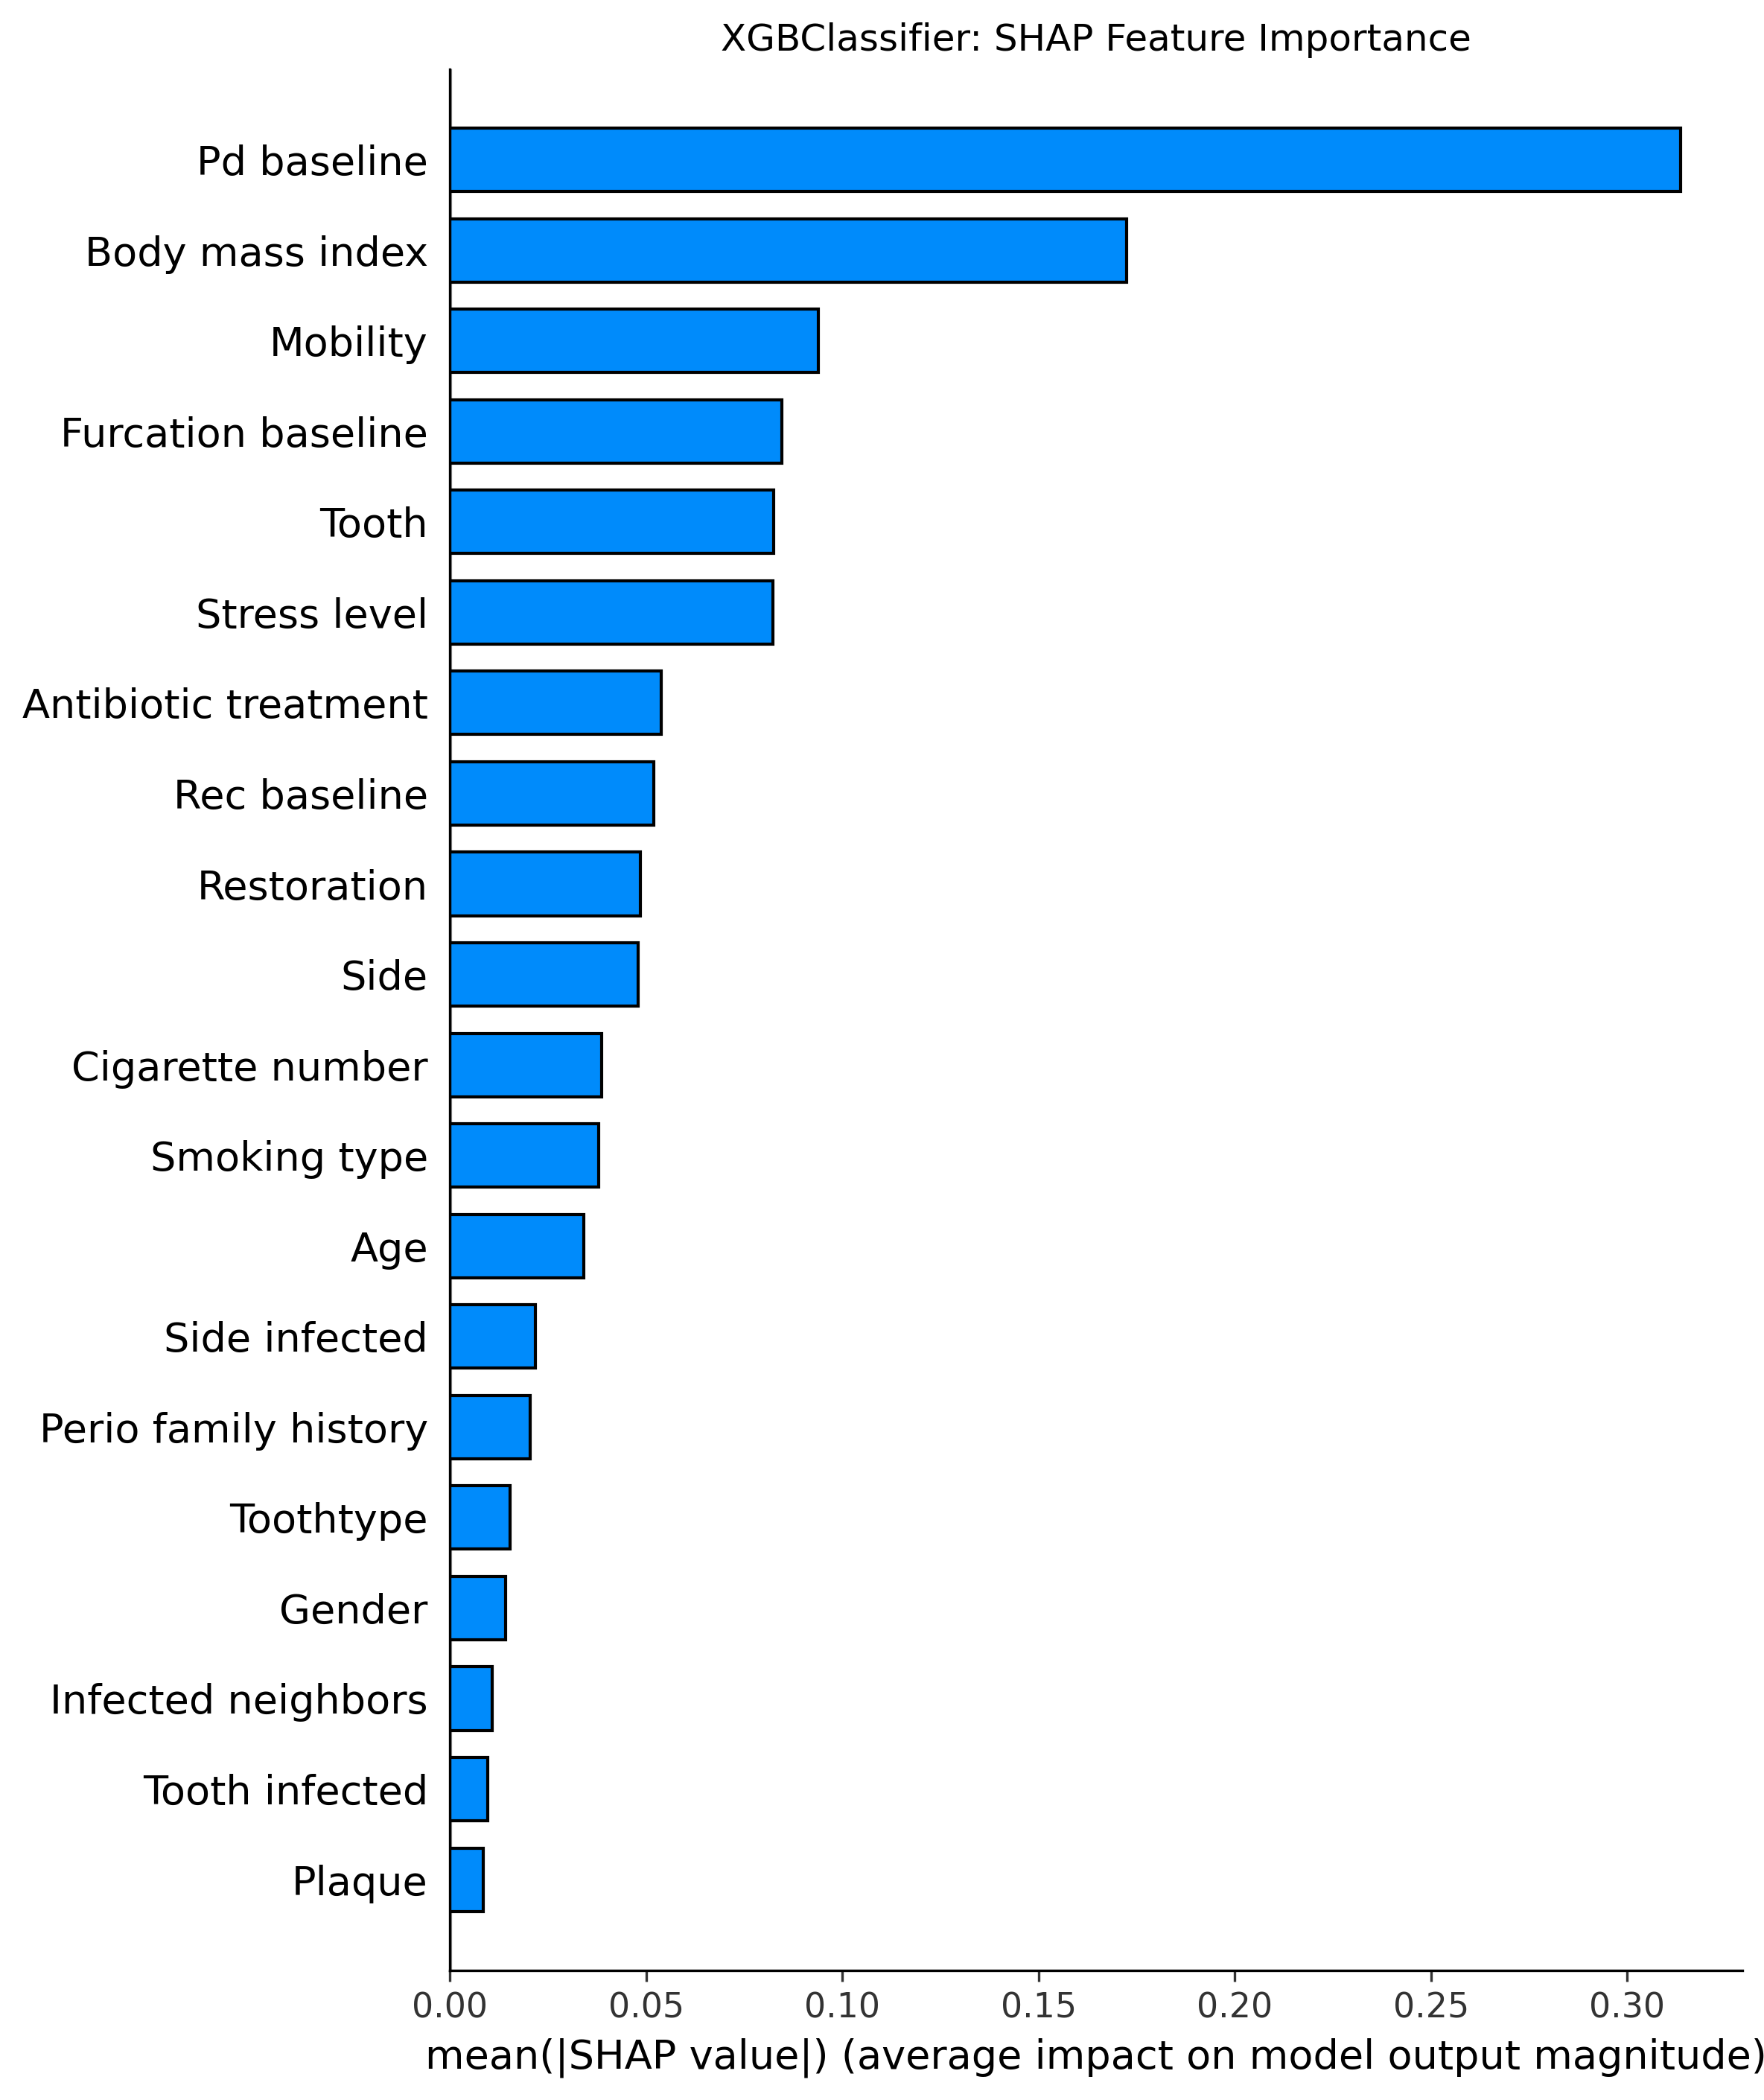

In [9]:
evaluator.evaluate_feature_importance(fi_types=["shap"])